In [1]:
from collections import Counter
import itertools
import sys
from collections import OrderedDict
import bioframe
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import random
import seaborn as sns
import scipy
import pickle


# sampled data: gated and exported from FlowJo v10


In [30]:
r1m=pd.read_csv('/home/allana.schooley-umw/as38w/VA-Nup-Degrons/2023ranger/figures/FACS/rgtime_6225export/export_rg_rgmM_sampled6225.csv')
r2m=pd.read_csv('/home/allana.schooley-umw/as38w/VA-Nup-Degrons/2023ranger/figures/FACS/rgtime_6225export/export_rg_m1h_sampled6225.csv')
r3m=pd.read_csv('/home/allana.schooley-umw/as38w/VA-Nup-Degrons/2023ranger/figures/FACS/rgtime_6225export/export_rg_m2h_sampled6225.csv')
r4m=pd.read_csv('/home/allana.schooley-umw/as38w/VA-Nup-Degrons/2023ranger/figures/FACS/rgtime_6225export/export_rg_m3p5_sampled6225.csv')
r5m=pd.read_csv('/home/allana.schooley-umw/as38w/VA-Nup-Degrons/2023ranger/figures/FACS/rgtime_6225export/export_rg_m5_sampled6225.csv')

print(len(r4m))


6225


In [31]:
#reduce range for plotting (not %)

r1m['stage']='unknown'
r1m.loc[(r1m['PE-A'] > 30000)&(r1m['PE-A'] < 60000), 'stage'] = 'G1'
r1m.loc[(r1m['PE-A'] > 80000)&(r1m['PE-A'] < 110000), 'stage'] = 'M'
r1msub=r1m[r1m['stage']!='unknown']

r2m['stage']='unknown'
r2m.loc[(r2m['PE-A'] > 30000)&(r2m['PE-A'] < 60000), 'stage'] = 'G1'
r2m.loc[(r2m['PE-A'] > 80000)&(r2m['PE-A'] < 110000), 'stage'] = 'M'
r2msub=r2m[r2m['stage']!='unknown']

r3m['stage']='unknown'
r3m.loc[(r3m['PE-A'] > 30000)&(r3m['PE-A'] < 60000), 'stage'] = 'G1'
r3m.loc[(r3m['PE-A'] > 80000)&(r3m['PE-A'] < 110000), 'stage'] = 'M'
r3msub=r3m[r3m['stage']!='unknown']

r4m['stage']='unknown'
r4m.loc[(r4m['PE-A'] > 30000)&(r4m['PE-A'] < 60000), 'stage'] = 'G1'
r4m.loc[(r4m['PE-A'] > 80000)&(r4m['PE-A'] < 110000), 'stage'] = 'M'
r4msub=r4m[r4m['stage']!='unknown']

r5m['stage']='unknown'
r5m.loc[(r5m['PE-A'] > 30000)&(r5m['PE-A'] < 60000), 'stage'] = 'G1'
r5m.loc[(r5m['PE-A'] > 80000)&(r5m['PE-A'] < 110000), 'stage'] = 'M'
r5msub=r5m[r5m['stage']!='unknown']


r5m


,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,Event #,PE-A,PE-H,PE-W,sampled :: (Event #%9) - 0.5 + (Event #/(56508 + 1)),sampled6225 :: (Event #%9) - 0.5 + (Event #/(56508 + 1)),Time,stage
0,43383.1,37143,76546.2,10040.2,8943,73576.5,29,40114.9,39382,66755.6,0.500495,0.500495,0.383,G1
1,81848.8,42034,127612.0,66246.5,38622,112411.0,39,94263.3,55227,111859.0,1.500670,1.500670,0.443,M
2,63383.8,41743,99511.8,44105.7,35378,81703.5,46,49782.8,44263,73708.6,-0.499204,-0.499204,0.483,G1
3,74004.0,47927,101194.0,43696.8,35495,80679.4,55,52730.6,48774,70852.4,-0.499044,-0.499044,0.524,G1
4,22410.4,17468,84078.9,16713.6,14796,74029.4,64,45787.8,40425,74230.0,-0.498885,-0.498885,0.561,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,79926.1,35239,148643.0,70369.8,33819,136366.0,56467,94792.9,55775,111382.0,0.499239,0.499239,300.756,M
6221,87632.5,44359,129468.0,56811.5,28479,130735.0,56476,92266.7,49574,121975.0,0.499398,0.499398,300.805,M
6222,51252.8,36067,93129.5,32576.2,26207,81463.6,56485,50837.7,45494,73233.8,0.499558,0.499558,300.859,G1
6223,102983.0,47986,140648.0,68999.6,45630,99100.5,56494,52750.2,45689,75664.5,0.499717,0.499717,300.990,G1


# import datashader utilities

In [32]:
from datashader.mpl_ext import dsshow, alpha_colormap
import datashader as ds
import datashader.transfer_functions as tf
from functools import partial


# plot

/tmp/ipykernel_855939/1525738897.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data=r1m, x="PE-A", hue="stage",bw_adjust=.7,ax=ax, fill=True,palette=['coral','maroon'],alpha=0.6,lw=0.5)
/tmp/ipykernel_855939/1525738897.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data=r1m, x="PE-A", hue="stage",bw_adjust=.7,ax=ax, palette=['black','black'],alpha=1,lw=0.5)


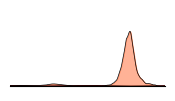

In [33]:
fig,ax=plt.subplots(figsize=(2,1))
sns.kdeplot(data=r1m, x="PE-A", hue="stage",bw_adjust=.7,ax=ax, fill=True,palette=['coral','maroon'],alpha=0.6,lw=0.5)
sns.kdeplot(data=r1m, x="PE-A", hue="stage",bw_adjust=.7,ax=ax, palette=['black','black'],alpha=1,lw=0.5)

ax.get_legend().remove()
ax.set_xlim(25000,115000)
ax.set_ylim(0,0.00015)
#ax.set_yticks([0.0001])
ax.set_yticks([])
ax.set_xticks([])
ax.set_yticklabels([],visible=False)
ax.set_xticklabels([],visible=False)
ax.set_xlabel([],visible=False)
ax.set_ylabel([],visible=False)
ax.spines[['left','right', 'top']].set_visible(False)


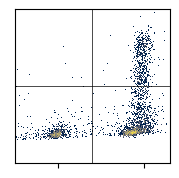

In [34]:
fig,ax=plt.subplots(figsize=(2,2))
dsshow(r3m, ds.Point('PE-A', 'PE-W'), norm='log', aspect='auto',cmap="cividis",ax=ax,width_scale=1.5,height_scale=1.5);
ax.set_xlim(25000,115000)
ax.set_ylim(50000,150000)
ax.set_yticks([])
ax.set_xticks([50000,100000])
ax.set_yticklabels([],visible=False)
ax.set_xticklabels([],visible=False)
ax.vlines([70000],0,200000, color='black',lw=0.5)
ax.hlines([100000],0,200000, color='black',lw=0.5)


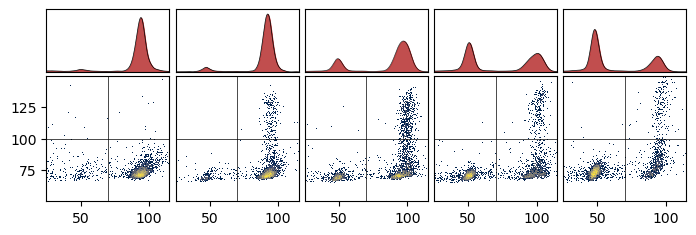

In [35]:
fig, ((ax0, ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8,ax9)) = plt.subplots(nrows=2, ncols=5,figsize=(8,2.4),gridspec_kw = {'height_ratios':[0.5,1],'width_ratios':[1,1,1,1,1]})

sns.kdeplot(data=r1m, x="PE-A", bw_adjust=.5,ax=ax0, fill=True,color='firebrick',alpha=0.8,lw=0.5)
sns.kdeplot(data=r1m, x="PE-A", bw_adjust=.5,ax=ax0, color='black',alpha=1,lw=0.5)

sns.kdeplot(data=r2m, x="PE-A", bw_adjust=.5,ax=ax1, fill=True,color='firebrick',alpha=0.8,lw=0.5)
sns.kdeplot(data=r2m, x="PE-A", bw_adjust=.5,ax=ax1, color='black',alpha=1,lw=0.5)

sns.kdeplot(data=r3m, x="PE-A", bw_adjust=.5,ax=ax2, fill=True,color='firebrick',alpha=0.8,lw=0.5)
sns.kdeplot(data=r3m, x="PE-A", bw_adjust=.5,ax=ax2, color='black',alpha=0.8,lw=0.5)

sns.kdeplot(data=r4m, x="PE-A", bw_adjust=.5,ax=ax3, fill=True,color='firebrick',alpha=0.8,lw=0.5)
sns.kdeplot(data=r4m, x="PE-A", bw_adjust=.5,ax=ax3, color='black',alpha=1,lw=0.5)

sns.kdeplot(data=r5m, x="PE-A", bw_adjust=.5,ax=ax4, fill=True,color='firebrick',alpha=0.8,lw=0.5)
sns.kdeplot(data=r5m, x="PE-A", bw_adjust=.5,ax=ax4, color='black',alpha=1,lw=0.5)

for ax in [ax0, ax1, ax2,ax3,ax4]:
    ax.set_xlim(25000,115000)
    ax.set_ylim(0,0.00011)
    #ax.set_yticks([0.0001])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([],visible=False)
    ax.set_xticklabels([],visible=False)
    ax.set_xlabel([],visible=False)
    ax.set_ylabel([],visible=False)
    #ax.spines[['left','right', 'top','bottom']].set_visible(False)


dsshow(r1m, ds.Point('PE-A', 'PE-W'), norm='log', cmap="cividis",aspect='auto',ax=ax5,width_scale=1.5,height_scale=1.5)
dsshow(r2m, ds.Point('PE-A', 'PE-W'), norm='log', cmap="cividis",aspect='auto',ax=ax6,width_scale=1.5,height_scale=1.5)
dsshow(r3m, ds.Point('PE-A', 'PE-W'), norm='log', cmap="cividis",aspect='auto',ax=ax7,width_scale=1.5,height_scale=1.5)
dsshow(r4m, ds.Point('PE-A', 'PE-W'), norm='log', cmap="cividis",aspect='auto',ax=ax8,width_scale=1.5,height_scale=1.5)
dsshow(r5m, ds.Point('PE-A', 'PE-W'), norm='log', cmap="cividis",aspect='auto',ax=ax9,width_scale=1.5,height_scale=1.5)

for ax in [ax5, ax6, ax7,ax8,ax9]:
    ax.set_xlim(25000,115000)
    ax.set_ylim(50000,150000)
    ax.set_yticks([])
    ax.set_xticks([50000,100000])
    ax.set_yticklabels([],visible=False)
    ax.set_xticklabels([50,100])
    ax.vlines([70000],0,200000, color='black',lw=0.5)
    ax.hlines([100000],0,200000, color='black',lw=0.5)
    
ax5.set_yticks([75000,100000,125000])
ax5.set_yticklabels([75,100,125])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.04)

#plt.savefig('.pdf',dpi=300,bbox_inches='tight')

